In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
from prophet import Prophet

In [ ]:
!pip install nltk
!pip install prophet

#EV stations Analysis

In [ ]:
df=pd.read_excel('/content/ev_station_data.xlsx')
df.head()

uid                    name             vendor_name  \
0  STATIC12  GensolCharge Pvt. Ltd.  GensolCharge Pvt. Ltd.   
1  STATIC14                    REIL                    REIL   
2  STATIC15                    REIL                    REIL   
3  STATIC16                    REIL                    REIL   
4  STATIC17                BluSmart                BluSmart   

                                      address   latitude  longitude   city  \
0             NDSE Grid, BRPL South Extension  28.568238  77.219666  Delhi   
1                       Scada office kalka ji  28.541995  77.260583  Delhi   
2                   Ashram Chowk Mathura Road  28.571189  77.259806  Delhi   
3                  Nizamuddin Railway station  28.588991  77.253240  Delhi   
4  BSES Bhawan, Nehru Place, New Delhi 110048  28.549427  77.254636  Delhi   

  country      open     close  ... postal_code           zone   0 available  \
0   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
1   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
2   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
3   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   
4   India  00:00:00  23:59:59  ...      110001  central-delhi NaN       NaN   

  capacity  cost_per_unit power_type  total         type        vehicle_type  
0    15 kW            NaN         DC    2.0  BEVC DC 001              ['4W']  
1   3.3 kW            NaN         AC    3.0  BEVC AC 001  ['2W', '3W', '4W']  
2    15 kW            NaN         DC    2.0  BEVC DC 001              ['4W']  
3    15 kW            NaN         DC    4.0  BEVC DC 001              ['4W']  
4    15 kW            NaN         DC    1.0  BEVC DC 001              ['4W']  

[5 rows x 25 columns]

In [ ]:
df['city'].value_counts()

city
New Delhi             1743
Delhi                  704
Nagpur                  98
Chennai                 48
Kolkata                 25
Ahmedabad               12
Raipur                   8
Thiruvananthapuram       8
Panaji                   6
Kottayam                 6
Kochi                    4
Dehradun                 4
Thrissur                 3
Alappuzha                3
Dhanbad                  3
Kannur                   3
Kozhikode                3
Hardwar                  3
Malappuram               3
Mapusa                   3
Kasaragod                3
Palakkad                 3
Kollam                   3
Dwarka                   3
Gurgaon                  2
Bengaluru                1
Name: count, dtype: int64

*We can see that Delhi has most of the EV stations.*

In [ ]:
print(f'List of columns - {df.columns}')

print(f'Shape of the dataframe - {df.shape}')

List of columns - Index([            'uid',            'name',     'vendor_name',
               'address',        'latitude',       'longitude',
                  'city',         'country',            'open',
                 'close',        'logo_url',           'staff',
         'payment_modes', 'contact_numbers',    'station_type',
           'postal_code',            'zone',                 0,
             'available',        'capacity',   'cost_per_unit',
            'power_type',           'total',            'type',
          'vehicle_type'],
      dtype='object')
Shape of the dataframe - (2705, 25)


In [ ]:
df.isnull().sum()

uid                   0
name                  0
vendor_name           0
address               0
latitude              0
longitude             0
city                  0
country               0
open                  0
close                 0
logo_url            467
staff                 0
payment_modes         0
contact_numbers       0
station_type          0
postal_code           0
zone                295
0                  2705
available           238
capacity            208
cost_per_unit       252
power_type          208
total               208
type                208
vehicle_type        208
dtype: int64

In [ ]:
df.drop(columns=[0]  , inplace=True) #Since Zero has all missing values.
df.head()

uid                    name             vendor_name  \
0  STATIC12  GensolCharge Pvt. Ltd.  GensolCharge Pvt. Ltd.   
1  STATIC14                    REIL                    REIL   
2  STATIC15                    REIL                    REIL   
3  STATIC16                    REIL                    REIL   
4  STATIC17                BluSmart                BluSmart   

                                      address   latitude  longitude   city  \
0             NDSE Grid, BRPL South Extension  28.568238  77.219666  Delhi   
1                       Scada office kalka ji  28.541995  77.260583  Delhi   
2                   Ashram Chowk Mathura Road  28.571189  77.259806  Delhi   
3                  Nizamuddin Railway station  28.588991  77.253240  Delhi   
4  BSES Bhawan, Nehru Place, New Delhi 110048  28.549427  77.254636  Delhi   

  country      open     close  ... station_type postal_code           zone  \
0   India  00:00:00  23:59:59  ...     charging      110001  central-delhi   
1   India  00:00:00  23:59:59  ...     charging      110001  central-delhi   
2   India  00:00:00  23:59:59  ...     charging      110001  central-delhi   
3   India  00:00:00  23:59:59  ...     charging      110001  central-delhi   
4   India  00:00:00  23:59:59  ...     charging      110001  central-delhi   

  available capacity  cost_per_unit power_type  total         type  \
0       NaN    15 kW            NaN         DC    2.0  BEVC DC 001   
1       NaN   3.3 kW            NaN         AC    3.0  BEVC AC 001   
2       NaN    15 kW            NaN         DC    2.0  BEVC DC 001   
3       NaN    15 kW            NaN         DC    4.0  BEVC DC 001   
4       NaN    15 kW            NaN         DC    1.0  BEVC DC 001   

         vehicle_type  
0              ['4W']  
1  ['2W', '3W', '4W']  
2              ['4W']  
3              ['4W']  
4              ['4W']  

[5 rows x 24 columns]

In [ ]:
print(f"Number of payment methods : {df['payment_modes'].unique()}")
print(f"Counts all types of payment methods : { df['payment_modes'].value_counts()}")

Number of payment methods : ['Card, E-Wallet, UPI' 'E-Wallet' 'Cash/E-Wallet' 'E-wallet'
 'Online through App (e-wallets)' 'E-wallet, cash' 'UPI'
 'E-wallet,cash,Credit,Debit Card' 'E-wallet, UPI'
 'Jio-bp Pulse app wallet' 'Cash/UPI']
Counts all types of payment methods : payment_modes
UPI                                1868
E-wallet                            417
Cash/UPI                            207
E-wallet, cash                      166
E-wallet,cash,Credit,Debit Card      18
Card, E-Wallet, UPI                   7
E-Wallet                              6
Cash/E-Wallet                         6
E-wallet, UPI                         5
Jio-bp Pulse app wallet               3
Online through App (e-wallets)        2
Name: count, dtype: int64


In [ ]:
df['capacity'].fillna('0 kW', inplace=True)
df['city'] = df['city'].replace('Delhi', 'New Delhi')

df['staff'] = df['staff'].replace('Staffed', 'staffed')
df['staff'] = df['staff'].replace('UnStaffed', 'unstaffed')
df['staff'] = df['staff'].replace('Unstaffed', 'unstaffed')

Text(0.5, 0, 'Number of Payment Modes Accepted')

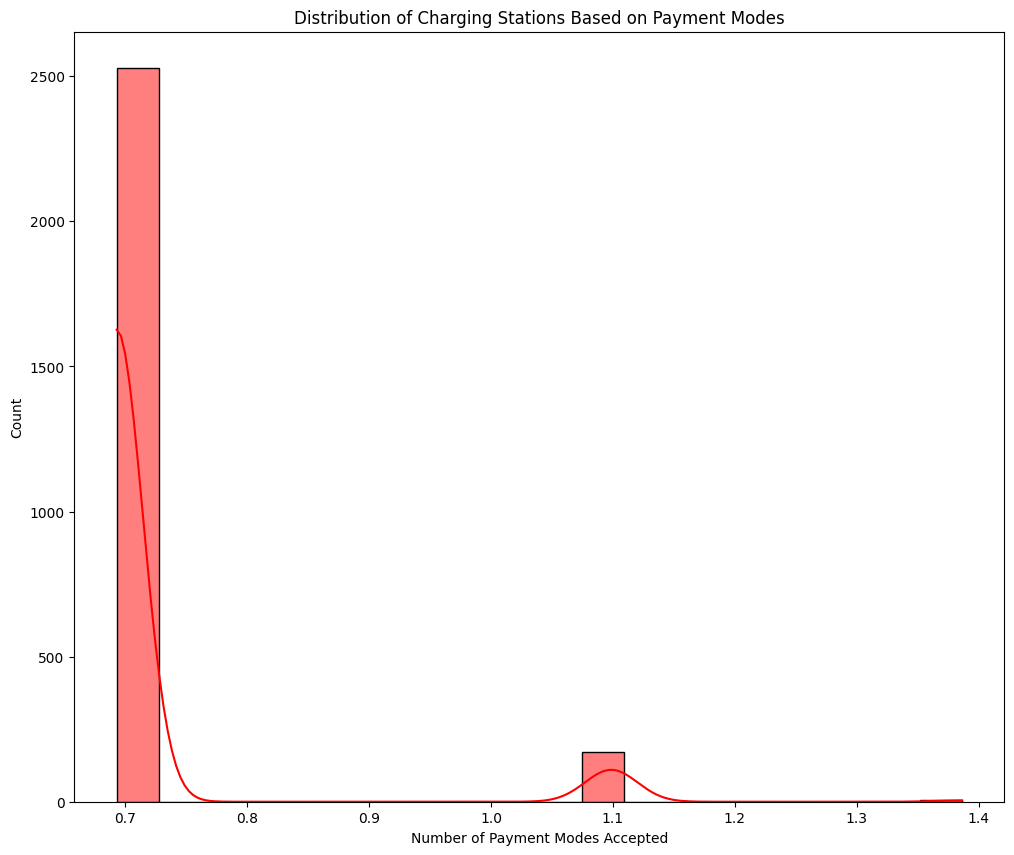

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
payment_modes_distribution = df['payment_modes'].apply(lambda x: len(str(x).split(', ')) if pd.notnull(x) else 0)
payment_modes_distribution = np.log1p(payment_modes_distribution)
sns.histplot(payment_modes_distribution, bins=20, kde=True, color='red', ax=ax)
ax.set_title('Distribution of Charging Stations Based on Payment Modes')
ax.set_xlabel('Number of Payment Modes Accepted')

In [ ]:
print(f" Capacity : {df['capacity'].unique()}")
print(f"Counts all types of Capacity : { df['capacity'].value_counts()}")

 Capacity : [ 15.    3.3  30.   20.   22.  142.   50.    0.   26.    9.9   7.    7.4
   nan  16.   56.   10.   28.   60. ]
Counts all types of Capacity : capacity
3.3      1882
142.0     258
15.0      210
0.0       208
22.0       37
9.9        29
7.0        19
56.0       16
26.0       16
28.0        9
10.0        8
30.0        4
7.4         2
50.0        1
20.0        1
16.0        1
60.0        1
Name: count, dtype: int64


Text(0.5, 0, 'Power Capacity (kW)')

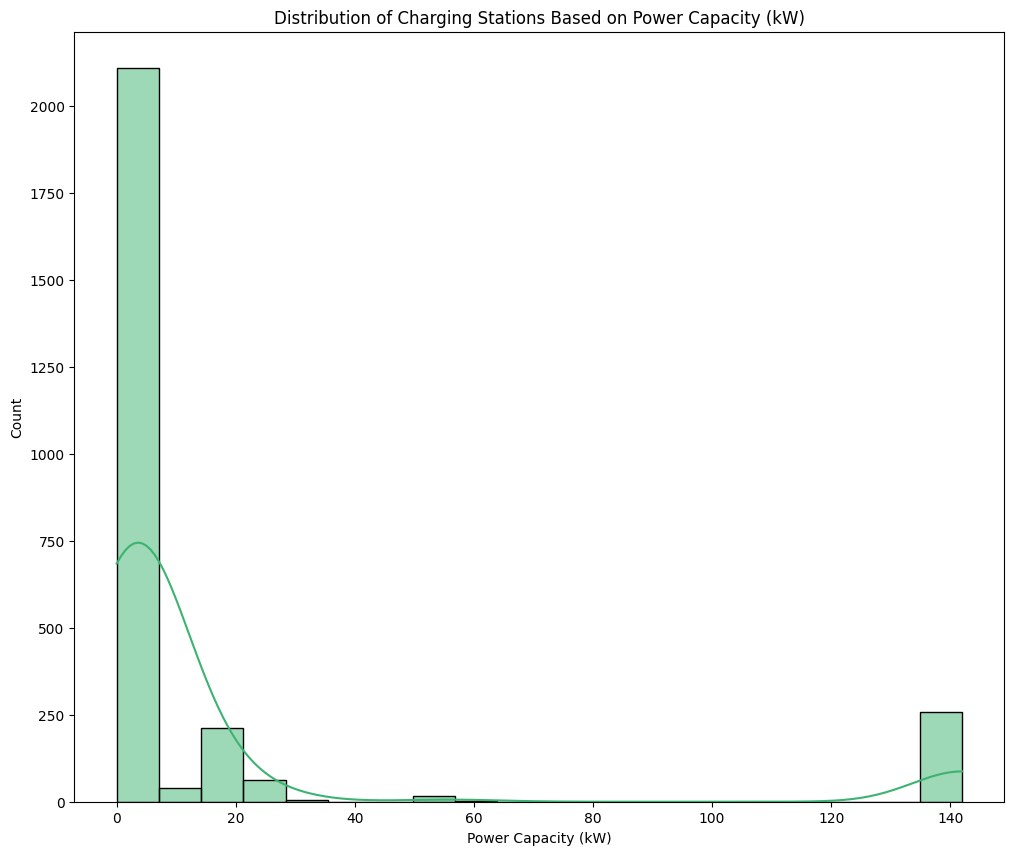

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(12,10))
df['capacity'] = df['capacity'].replace({'kW': ''}, regex=True)
df['capacity'] = pd.to_numeric(df['capacity'], errors='coerce')
sns.histplot(df['capacity'], bins=20, kde=True, color='mediumseagreen', ax=axes)
axes.set_title('Distribution of Charging Stations Based on Power Capacity (kW)')
axes.set_xlabel('Power Capacity (kW)')

In [ ]:
print(f" Power Type : {df['power_type'].unique()}")
print(f"Counts all types of Capacity : { df['power_type'].value_counts()}")

 Power Type : ['DC' 'AC' nan]
Counts all types of Capacity : power_type
AC    2079
DC     418
Name: count, dtype: int64


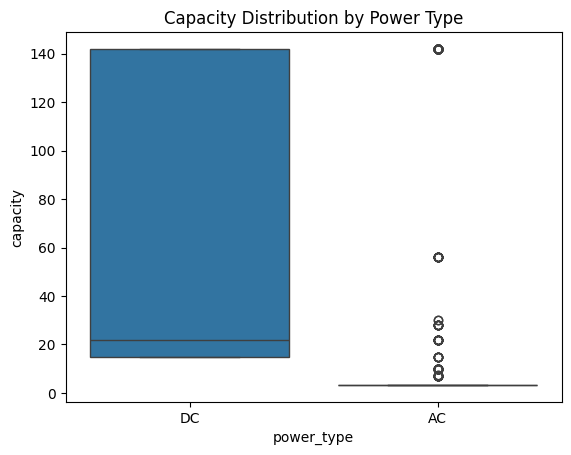

In [ ]:
sns.boxplot(x='power_type', y='capacity', data=df)
plt.title('Capacity Distribution by Power Type')
plt.show()

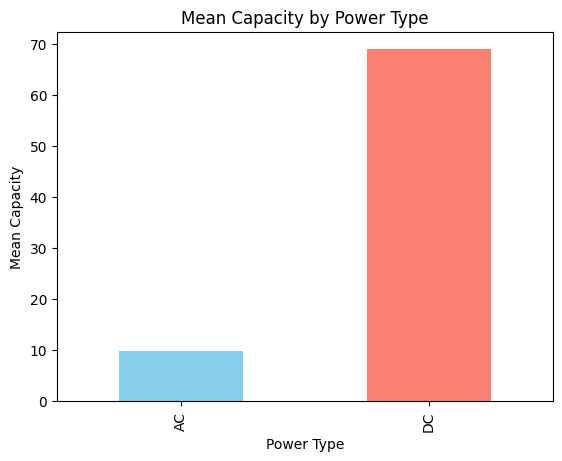

In [ ]:
mean_capacity = df.groupby('power_type')['capacity'].mean()
mean_capacity.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Mean Capacity by Power Type')
plt.xlabel('Power Type')
plt.ylabel('Mean Capacity')
plt.show()

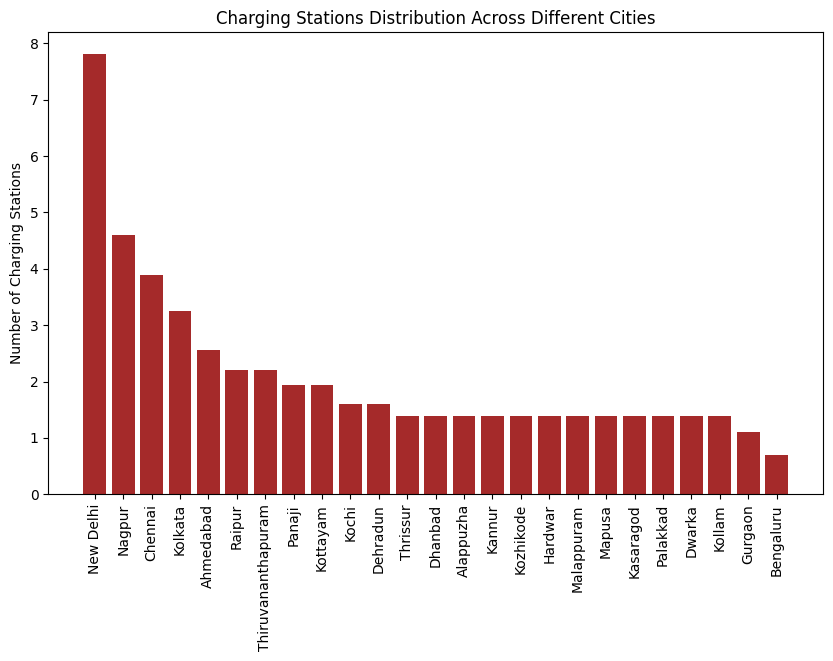

In [ ]:
fig ,axes = plt.subplots(1,1,figsize=(10,6))
city_distribution = df['city'].value_counts()
city_distribution = np.log1p(city_distribution)
axes.bar(city_distribution.index, city_distribution.values, color='brown')
axes.set_title('Charging Stations Distribution Across Different Cities')
axes.set_ylabel('Number of Charging Stations')
axes.tick_params(axis='x', rotation=90)

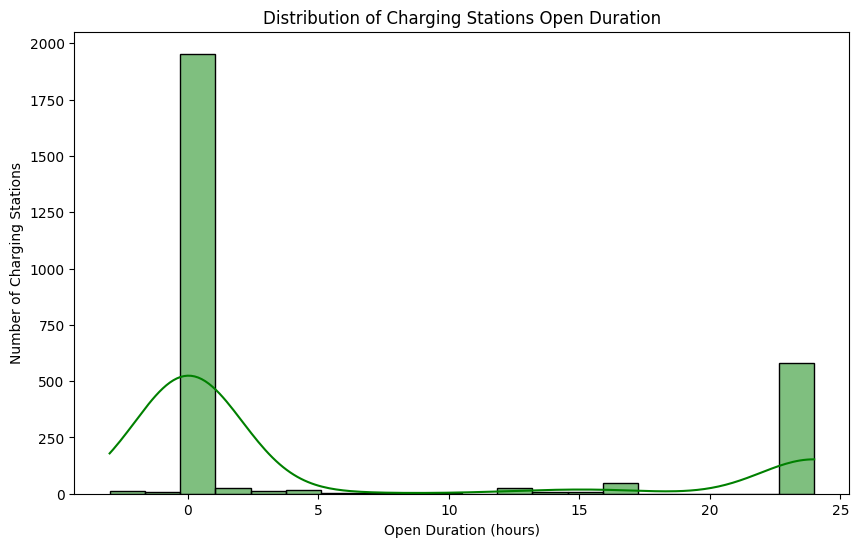

In [ ]:
df['open'] = pd.to_datetime(df['open'])
df['close'] = pd.to_datetime(df['close'])
df['duration'] = df['close'] - df['open']
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'].dt.total_seconds() / 3600, bins=20, kde=True, color='green')
plt.title('Distribution of Charging Stations Open Duration')
plt.xlabel('Open Duration (hours)')
plt.ylabel('Number of Charging Stations')
plt.show()

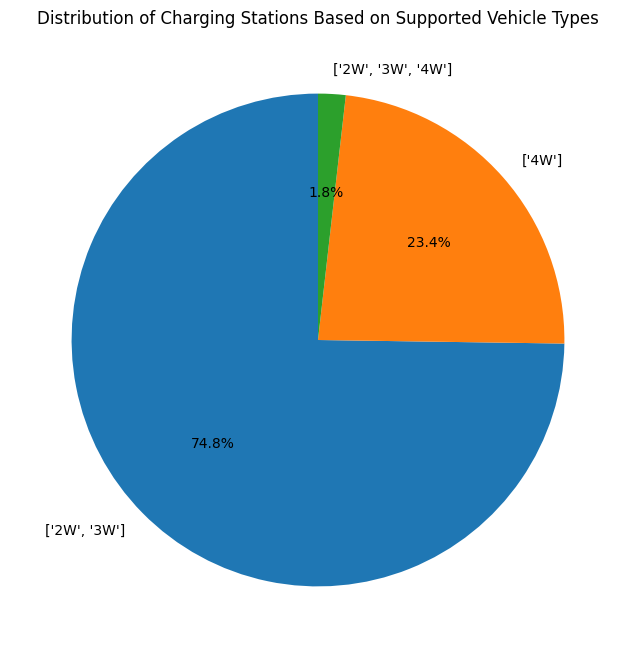

In [ ]:
vehicle_type_counts = df['vehicle_type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Charging Stations Based on Supported Vehicle Types')
plt.show()

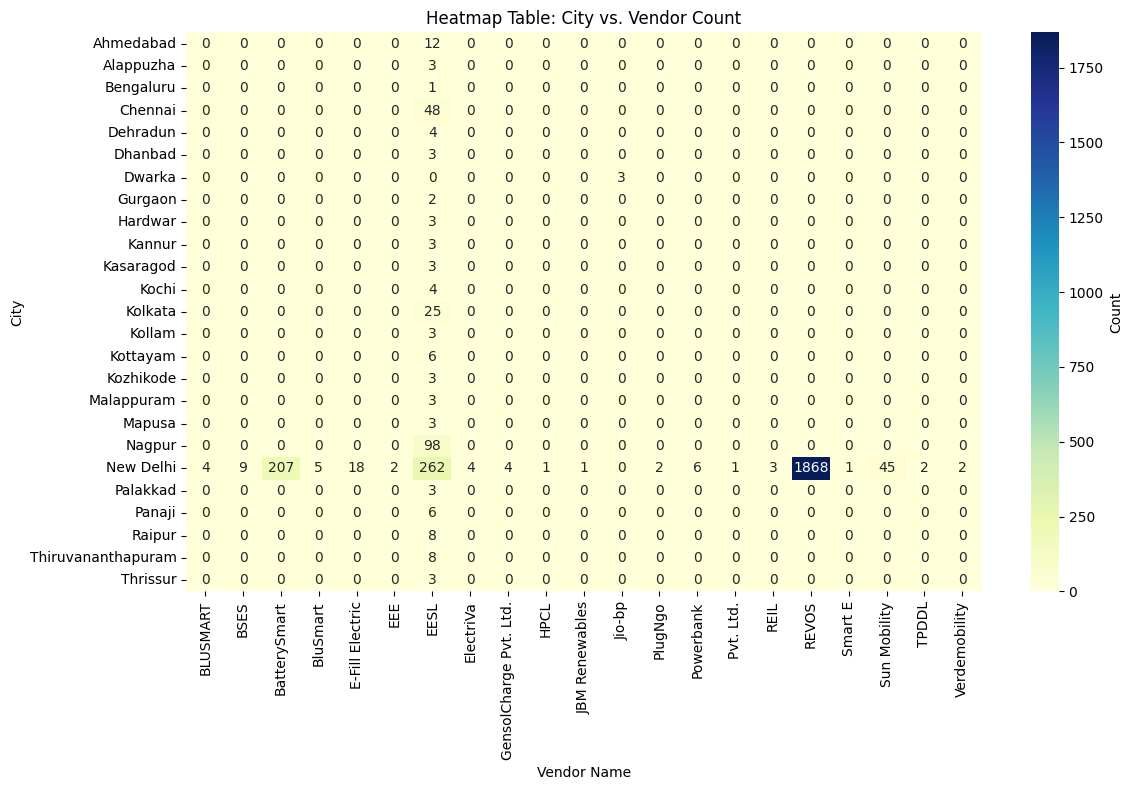

In [ ]:
city_vendor_pivot=df.pivot_table(index='city', columns='vendor_name', values='uid', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(city_vendor_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Count'}, fmt='g')
plt.title('Heatmap Table: City vs. Vendor Count')
plt.xlabel('Vendor Name')
plt.ylabel('City')

plt.tight_layout()
plt.show()

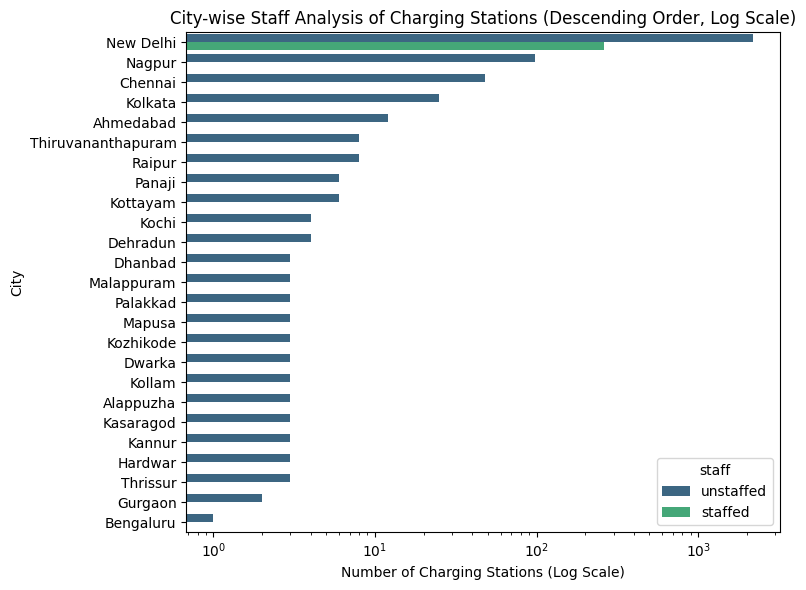

In [ ]:
city_station_counts = df.groupby('city')['uid'].count().reset_index()
sorted_cities = city_station_counts.sort_values(by='uid', ascending=False)['city']
plt.figure(figsize=(8, 6))
sns.countplot(y='city', hue='staff', data=df, order=sorted_cities, palette='viridis')
plt.xscale('log')
plt.title('City-wise Staff Analysis of Charging Stations (Descending Order, Log Scale)')
plt.ylabel('City')
plt.xlabel('Number of Charging Stations (Log Scale)')
plt.tight_layout()
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster
map_center = [df['latitude'].mean(), df['longitude'].mean()]
charging_map = folium.Map(location=map_center, zoom_start=5)
marker_cluster = MarkerCluster().add_to(charging_map)
for index, row in df.iterrows():
    popup_text = f"<b>{row['name']}</b><br>Vendor: {row['vendor_name']}<br>Contact: {', '.join(map(str, row['contact_numbers']))}"
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text).add_to(marker_cluster)

charging_map

**As we can clearly see that delhi has most of the power stations and also there are some states with opering vendors so, the em market can enter the in these emerging market. Since DC  are common so company can produce the commonly used power type. Even Chennai,Nagaland are new hotspot the company can establish a dominatant control over the EV market in these states. ALso based on capacity disteribution cars 3.3KW are most used ones and selling ones. Since most of the stations are eqipped with 3W and 4W facility so the EV designed by the company should avil this properties for better selling. This was analysis based on the power stations.**

##Forecasting EV stations

In [ ]:
df = pd.read_csv("/content/operational_pcs.csv")
df.tail()

Sl. No.                                  State/UT  No. of Operational PCS
29       30                                   Tripura                      18
30       31  Dadra and Nagar Haveli and Daman and Diu                       1
31       32                             Uttar Pradesh                     406
32       33                               Uttarakhand                      48
33       34                               West Bengal                     189

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sl. No.                 34 non-null     int64 
 1   State/UT                34 non-null     object
 2   No. of Operational PCS  34 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 944.0+ bytes


<ipython-input-23-3ea6c37b95bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='No. of Operational PCS' , y = 'State/UT' , data = df ,palette='viridis')


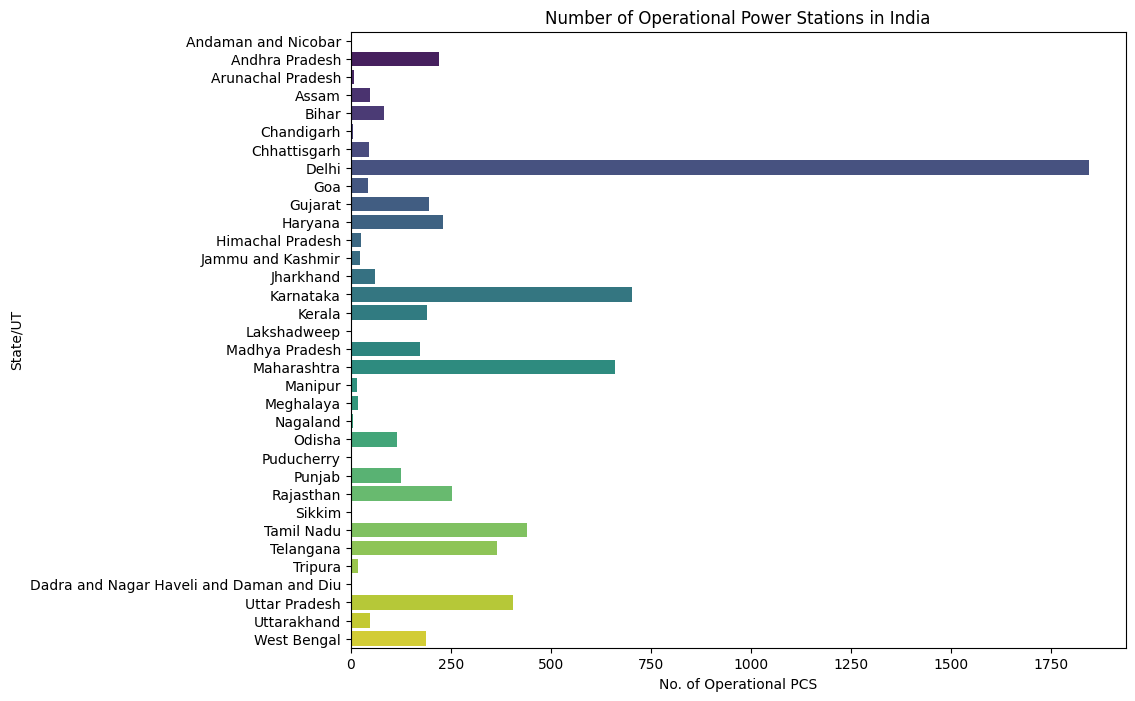

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x ='No. of Operational PCS' , y = 'State/UT' , data = df ,palette='viridis')
plt.title('Number of Operational Power Stations in India')
plt.xlabel('No. of Operational PCS')
plt.ylabel('State/UT')
plt.show()

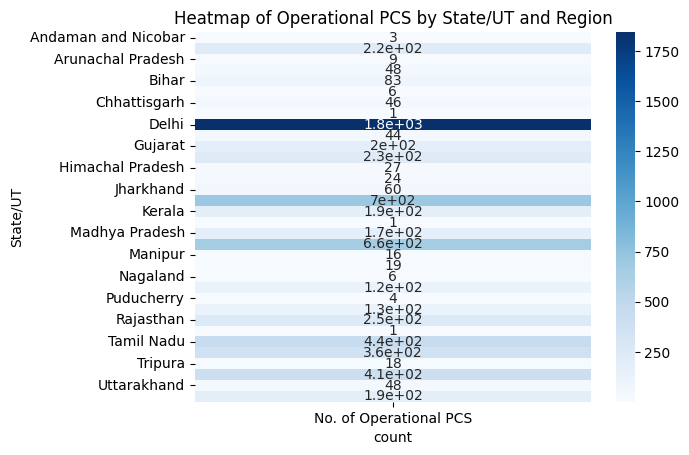

In [ ]:
pivot_table = df.pivot_table(index='State/UT',values = 'No. of Operational PCS',aggfunc='sum')
sns.heatmap(pivot_table, annot=True , cmap = 'Blues')
plt.title('Heatmap of Operational PCS by State/UT and Region')
plt.xlabel('count')
plt.ylabel('State/UT')
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppwddlf1v/09f5athj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppwddlf1v/w5lelluf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29647', 'data', 'file=/tmp/tmppwddlf1v/09f5athj.json', 'init=/tmp/tmppwddlf1v/w5lelluf.json', 'output', 'file=/tmp/tmppwddlf1v/prophet_modeloy2rianj/prophet_model-20240814223013.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:30:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:30:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

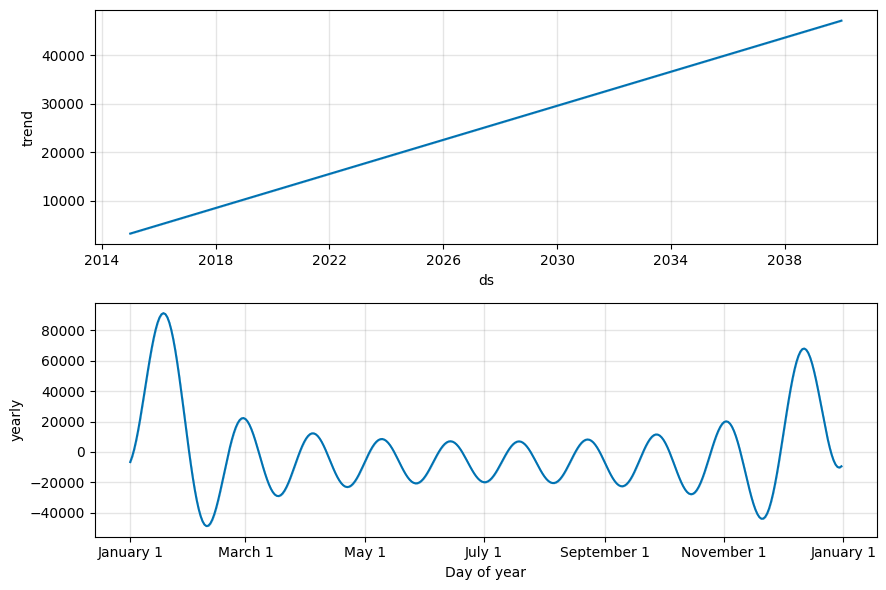

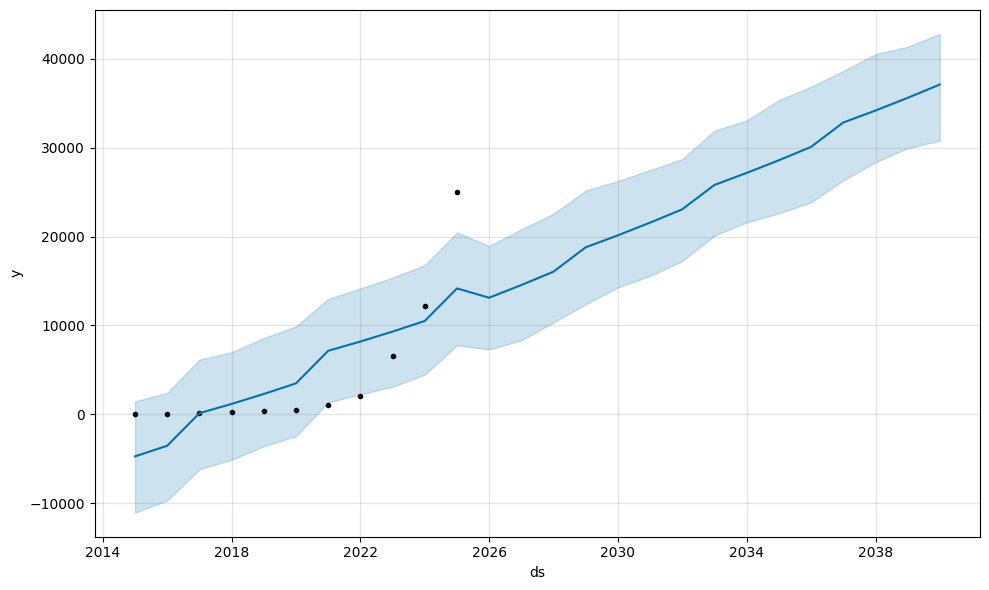

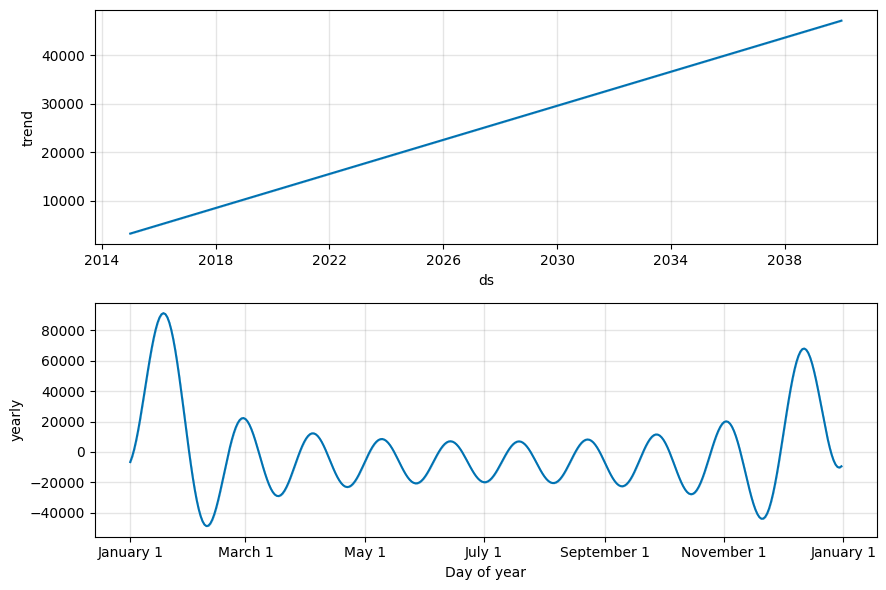

In [ ]:
data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,2025],
    'Total operation pcs': [0, 85, 103, 234, 343, 500, 1023, 2023, 6586, 12142 , 25000]
}

df = pd.DataFrame(data)
df.rename(columns={'Year': 'ds', 'Total operation pcs': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%Y')
model = Prophet()
model.fit(df)
future_dates = model.make_future_dataframe(periods=15, freq='Y')
forecast= model.predict(future_dates)
model.plot(forecast)
model.plot_components(forecast)

**Clearly with this distribution we can see that emerging states chennai,karanraka,Delhi,Maharastra will soon have huge demand in the coming years and since there are enough Ev stations people won't have much problem in charging them. Also using the procasting model we see the trend by 2039 there will be more than 50K Ev stations and demand will rise exponentionally.**

#EV wheeler segmentation

In [ ]:
df = pd.read_excel("/content/smev_data.xlsx" , sheet_name=None)

In [ ]:
df.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

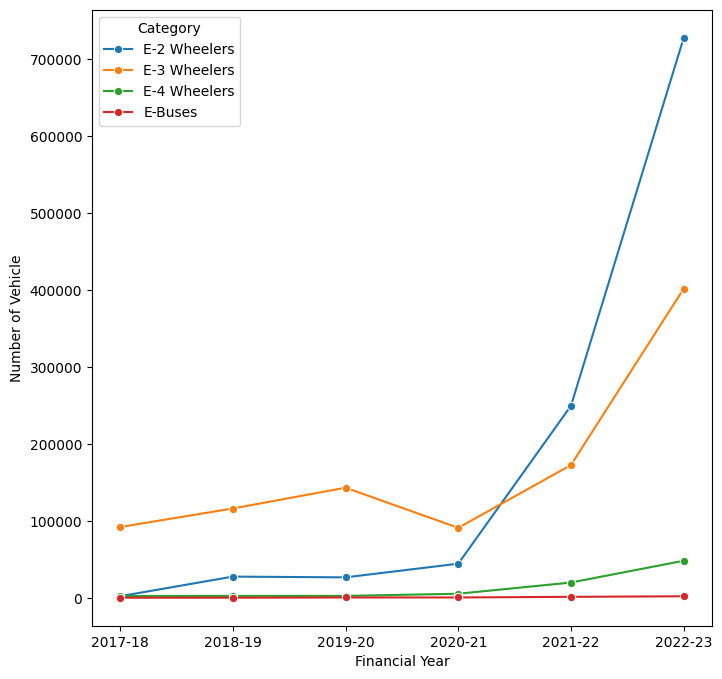

In [ ]:
fig , axes = plt.subplots(figsize=(8,8))
ax = sns.lineplot(data = df['EV Industries'] ,x='financial_year', y ='num_vehicles',hue='category',marker='o',palette='tab10' )
plt.xlabel("Financial Year")
plt.ylabel("Number of Vehicle")
plt.legend(title='Category')
plt.show()

In [ ]:
df['EV Market'] = df['EV Market'].sort_values('Amount INR Cr' , ascending = False)
df['EV Market']

Category  Amount INR Cr
0  E-2 Wheelers        2464.27
3       E-Buses         687.93
1  E-3 Wheelers         351.21
2  E-4 Wheelers         114.65

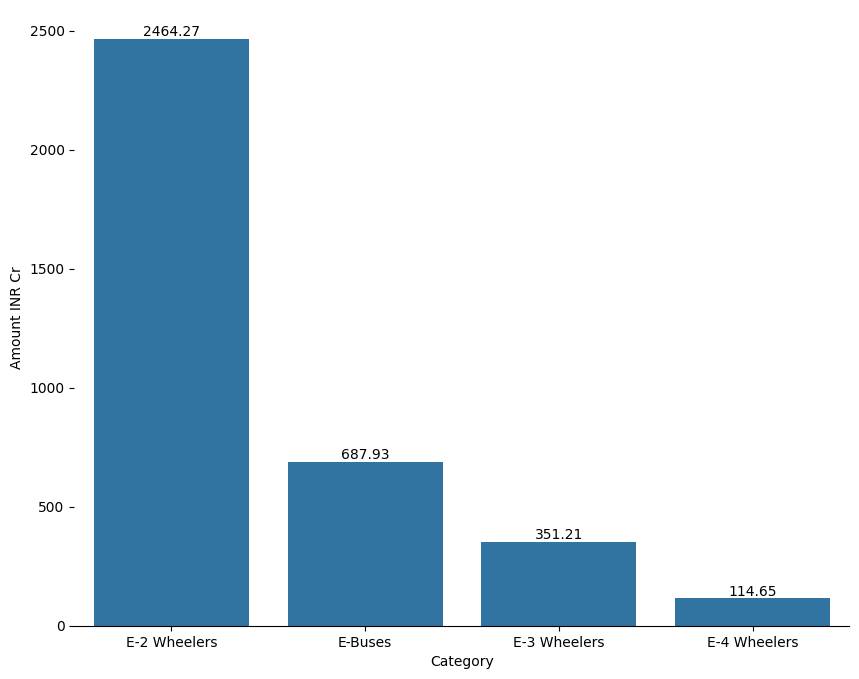

In [ ]:
fig,axes = plt.subplots(figsize=(10,8))
axes=sns.barplot(data=df['EV Market'] , x ='Category',y='Amount INR Cr')
axes.bar_label(axes.containers[0])
plt.xlabel("Category")
plt.ylabel("Amount INR Cr")
axes.spines[['top','left','right']].set_visible(False)
plt.show()

**Cleary we can see from above 2 graphs that E-2 vehicles has great potential growth in the coming years, apart from this E-2, E-3 wheelers are also blooming we that target this part of the segment.**

In [ ]:
two_wheeler = list(df.keys())[0:4]
df_two_wheeler= pd.concat([df[two_wheeler[0]], df[two_wheeler[1]], df[two_wheeler[2]], df[two_wheeler[3]]])
df_two_wheeler

financial_year          maker  market_share  month  num_vehicles
0          2019-20  Hero Electric          0.30    Apr          1776
1          2019-20  Hero Electric          0.30    May           455
2          2019-20  Hero Electric          0.30    Jun           329
3          2019-20  Hero Electric          0.30    Jul           260
4          2019-20  Hero Electric          0.30    Aug           249
..             ...            ...           ...    ...           ...
151        2022-23         OTHERS          0.08    Nov          5241
152        2022-23         OTHERS          0.08    Dec          5233
153        2022-23         OTHERS          0.08    Jan          5111
154        2022-23         OTHERS          0.08    Feb          5083
155        2022-23         OTHERS          0.08  March          7562

[504 rows x 5 columns]

In [ ]:
df_two_wheeler['maker']=df_two_wheeler['maker'].str.upper()
print(f"ALL MAKERS: {df_two_wheeler['maker'].unique()}")

ALL MAKERS: ['HERO ELECTRIC' 'OKINAWA AUTOTECH' 'ATHER ENERGY' 'AMPERE VEHICLES'
 'REVOLT' 'OTHERS' 'BAJAJ' 'PURE EV' 'BENLING' 'JITENDRA' 'TVS'
 'OLA ELECTRIC' 'OKINAWA' 'AMPERE' 'ATHER' 'OKAYA EV' 'BEING INDIA'
 'JITENDRA NEW EV']


In [ ]:
data_group = df_two_wheeler.groupby(['financial_year' , 'maker']).agg({'num_vehicles':'sum'}).reset_index()
print(data_group)

   financial_year             maker  num_vehicles
0         2019-20   AMPERE VEHICLES          2518
1         2019-20      ATHER ENERGY          2905
2         2019-20     HERO ELECTRIC          7865
3         2019-20  OKINAWA AUTOTECH         10135
4         2019-20            OTHERS          2026
5         2019-20            REVOLT          1063
6         2020-21   AMPERE VEHICLES          6089
7         2020-21      ATHER ENERGY          4401
8         2020-21             BAJAJ          1470
9         2020-21           BENLING          1108
10        2020-21     HERO ELECTRIC         15956
11        2020-21          JITENDRA           619
12        2020-21  OKINAWA AUTOTECH          6972
13        2020-21            OTHERS          2969
14        2020-21           PURE EV          2080
15        2020-21            REVOLT          1793
16        2020-21               TVS           837
17        2021-22   AMPERE VEHICLES         25517
18        2021-22      ATHER ENERGY         19979


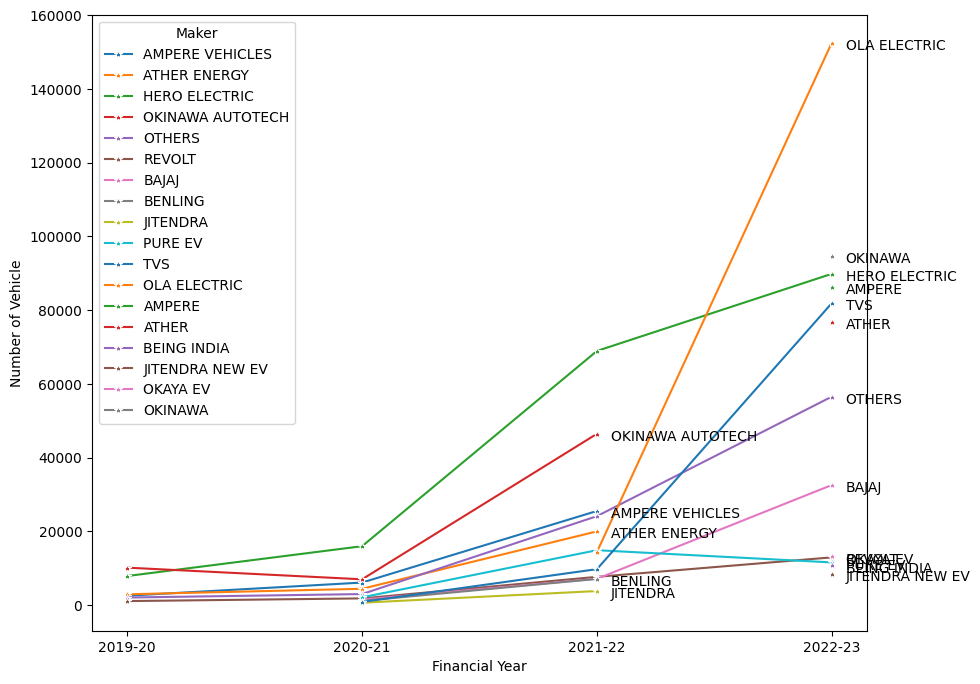

In [ ]:
fig,axes=plt.subplots(figsize=(10,8))
axes=sns.lineplot(data=data_group,x='financial_year',y='num_vehicles',hue='maker',marker='*',palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Number of Vehicle")
plt.legend(title='Maker')
for col in data_group['maker'].unique()[::1]:
    last_point = data_group[data_group['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}",
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5),
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_2w.png', format = 'png')
plt.show()

**We can obeserve that ola is the leading market in financial yeat 2023, maybe we can apply the techniques of ola and outperform them in the emerging regions like chennai,nagaland,Up,Maharastra. Apart from this we can also go deeper in these states and find the areas where ola or some is not dominat and dominatte in those areas.**

In [ ]:
df_bike = pd.read_csv("../content/ev2_bikewale.csv")
df_model = pd.read_csv("../content/ev_model_spec.csv")

In [ ]:
df = df_bike.merge(df_model, how = 'left', on = 'Model Name')
df.head()

review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  Comfort  Maintenance cost  \
0          NaN                 NaN             NaN      4.0               NaN   
1          NaN                 1.0             NaN      3.0               NaN   
2          NaN                 2.0             NaN      5.0               NaN   
3          NaN                 1.0             NaN      1.0               NaN   
4          NaN                 1.0             NaN      3.0               NaN   

   Value for Money Model Name   Price  Riding Range (km)  Top Speed (kmph)  \
0              1.0  TVS iQube  137890                100                78   
1              3.0  TVS iQube  137890                100                78   
2              2.0  TVS iQube  137890                100                78   
3              1.0  TVS iQube  137890                100                78   
4              2.0  TVS iQube  137890                100                78   

   Weight (kg)  Battery Charging Time (hrs)  Rated Power (W)  
0          117                            5             3000  
1          117                            5             3000  
2          117                            5             3000  
3          117                            5             3000  
4          117                            5             3000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [ ]:
nltk.download('vader_lexicon')
sentiment_checker=SentimentIntensityAnalyzer()
sentiments=[]
for text in df['review']:
    if pd.isna(text):
     sentiments.append('neutral')
     continue
    sentiment_score=sentiment_checker.polarity_scores(text)
    if(sentiment_score['pos']>sentiment_score['neg']):
      sentiments.append('positive')
    elif sentiment_score['pos']<sentiment_score['neg']:
      sentiments.append('negative')
    else:
      sentiments.append('neutral')

df['sentiments']=sentiments

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['sentiments'].value_counts()

sentiments
positive    527
negative    264
neutral      53
Name: count, dtype: int64

In [ ]:
df_segment = df[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiments']].copy()
df_segment.head()

Used it for      Owned for      Ridden for  rating  Visual Appeal  \
0  Daily Commute    Never owned             NaN       1            3.0   
1     Everything         > 1 yr      < 5000 kms       1            3.0   
2  Daily Commute     < 3 months      < 5000 kms       3            4.0   
3  Daily Commute  6 months-1 yr  5000-10000 kms       1            1.0   
4  Daily Commute  6 months-1 yr      < 5000 kms       1            3.0   

   Reliability  Performance  Service Experience  Extra Features  Comfort  \
0          4.0          NaN                 NaN             NaN      4.0   
1          1.0          NaN                 1.0             NaN      3.0   
2          4.0          NaN                 2.0             NaN      5.0   
3          1.0          NaN                 1.0             NaN      1.0   
4          4.0          NaN                 1.0             NaN      3.0   

   Maintenance cost  Value for Money sentiments  
0               NaN              1.0   negative  
1               NaN              3.0   negative  
2               NaN              2.0   positive  
3               NaN              1.0   negative  
4               NaN              2.0   negative

In [ ]:
df_segment.isnull().sum()

Used it for             0
Owned for               0
Ridden for            176
rating                  0
Visual Appeal         105
Reliability           128
Performance           499
Service Experience    141
Extra Features        659
Comfort               314
Maintenance cost      664
Value for Money       454
sentiments              0
dtype: int64

In [ ]:
# from sklearn.impute import KNNImputer
# columns_to_impute = [
#                      'Visual Appeal', 'Reliability', 'Performance',
#                      'Service Experience', 'Extra Features', 'Comfort',
#                      'Maintenance cost', 'Value for Money']
# df_impute = df_segment[columns_to_impute].apply(pd.to_numeric,errors='coerce')
# print(f"df_impute shape : {df_impute.shape}")
# knn_imputer=KNNImputer(n_neighbors=5)
# imputed_data=knn_imputer.fit_transform(df_impute)
# print(imputed_data.shape)
# df_imputed=pd.DataFrame(imputed_data,columns=columns_to_impute)
# df_segment[columns_to_impute]=df_imputed

df_impute shape : (844, 8)
(844, 8)


In [ ]:
df_segment = df_segment.fillna(0.)

In [ ]:
df_segment.head()

Used it for      Owned for      Ridden for  rating  Visual Appeal  \
0  Daily Commute    Never owned             0.0       1            3.0   
1     Everything         > 1 yr      < 5000 kms       1            3.0   
2  Daily Commute     < 3 months      < 5000 kms       3            4.0   
3  Daily Commute  6 months-1 yr  5000-10000 kms       1            1.0   
4  Daily Commute  6 months-1 yr      < 5000 kms       1            3.0   

   Reliability  Performance  Service Experience  Extra Features  Comfort  \
0          4.0          0.0                 0.0             0.0      4.0   
1          1.0          0.0                 1.0             0.0      3.0   
2          4.0          0.0                 2.0             0.0      5.0   
3          1.0          0.0                 1.0             0.0      1.0   
4          4.0          0.0                 1.0             0.0      3.0   

   Maintenance cost  Value for Money sentiments  
0               0.0              1.0   negative  
1               0.0              3.0   negative  
2               0.0              2.0   positive  
3               0.0              1.0   negative  
4               0.0              2.0   negative

In [ ]:
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         844 non-null    object 
 1   Owned for           844 non-null    object 
 2   Ridden for          844 non-null    object 
 3   rating              844 non-null    int64  
 4   Visual Appeal       844 non-null    float64
 5   Reliability         844 non-null    float64
 6   Performance         844 non-null    float64
 7   Service Experience  844 non-null    float64
 8   Extra Features      844 non-null    float64
 9   Comfort             844 non-null    float64
 10  Maintenance cost    844 non-null    float64
 11  Value for Money     844 non-null    float64
 12  sentiments          844 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 85.8+ KB


In [ ]:
df_segment=df_segment.iloc[:,4:12]

In [ ]:
df_segment.shape

(844, 8)

##PCA

In [ ]:
scaler = StandardScaler()
df_c = scaler.fit_transform(df_segment)

In [ ]:
pca = PCA(random_state=1)
pca.fit(df_c)

PCA(random_state=1)

In [ ]:
df_pc=pca.transform(df_c)

In [ ]:
df_pca=pd.DataFrame(df_pc,columns=[f'PC{x+1}' for x in range(len(df_segment.columns))])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.291227 -1.038055  0.354864 -0.623469 -1.102720 -0.169287 -0.438012   
1  0.710801 -1.394405 -0.360466 -0.621671  0.320899 -0.086053 -0.426279   
2 -0.849149 -1.189765  0.167683 -0.410898 -0.409054 -0.191904 -0.329993   
3  1.967022 -0.878935 -0.100197  0.330003 -0.075822  0.069599  0.013068   
4  0.078940 -1.017161 -0.079210 -0.324132 -0.961554  0.005517 -0.107260   

        PC8  
0  0.957827  
1 -0.149917  
2  0.830738  
3  0.011328  
4  0.427972

In [ ]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

Standard Deviation  Proportion of Variance  Cumultive Proportion
PC1            1.845017                0.425007              0.425007
PC2            1.736646                0.376546              0.801553
PC3            0.903486                0.101915              0.903468
PC4            0.517750                0.033468              0.936936
PC5            0.405239                0.020503              0.957439
PC6            0.379558                0.017987              0.975426
PC7            0.337883                0.014254              0.989680
PC8            0.287510                0.010320              1.000000

In [ ]:
factor_loadings=pd.DataFrame(pca.components_,columns=df_segment.columns,index=df_pca.columns).T
factor_loadings.style.background_gradient(cmap='Greens')

<ipython-input-30-4e4c905f2001>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0,0,factor_loadings['PC1'][i]*3.5,factor_loadings['PC2'][i]*3.5,head_width=0.05,head_length=0.1, fc='red', ec='red')
<ipython-input-30-4e4c905f2001>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text((factor_loadings['PC1'][i]*3.5),factor_loadings['PC2'][i]*3.5,index_names[i],fontsize=12, ha='center', color = 'red', va = 'center_baseline')


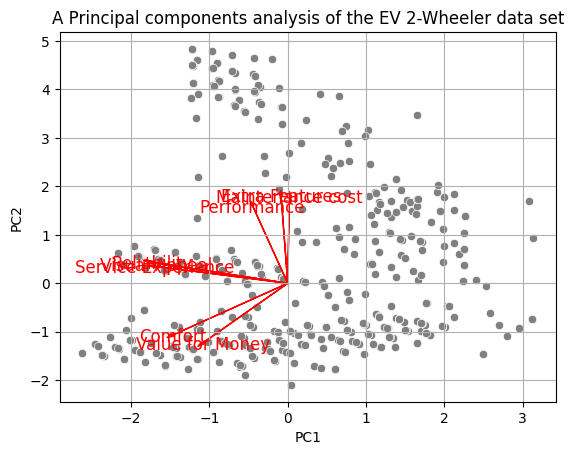

In [ ]:
index_names = factor_loadings.index
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0,0,factor_loadings['PC1'][i]*3.5,factor_loadings['PC2'][i]*3.5,head_width=0.05,head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i]*3.5),factor_loadings['PC2'][i]*3.5,index_names[i],fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

##Clustering

In [ ]:
clusters=[KMeans(n_clusters=i,random_state=40).fit(df_c) for i in range(2,9)]
inertia=[model.inertia_ for model in clusters]
print(inertia)

[4486.215783680851, 2505.8788898826456, 1719.2820800833117, 1437.8400591811592, 1155.8162672355008, 1046.3658291407767, 954.6497199083899]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

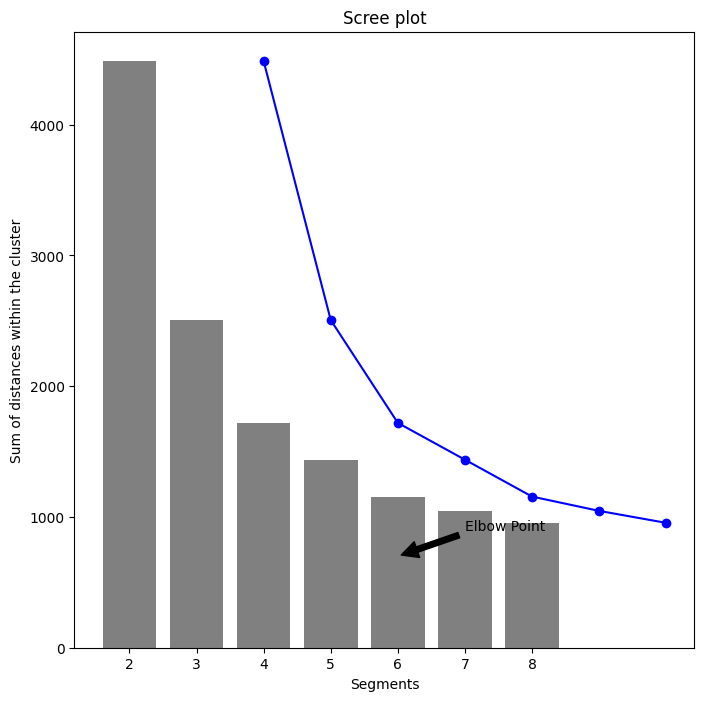

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x=list(range(2,9)) , y=inertia,color='grey')
plt.plot(list(range(2,9)),inertia,marker='o',color='blue')
plt.annotate('Elbow Point', xy=(4, 700), xytext=(5, 900),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("Segments")
plt.ylabel("Sum of distances within the cluster")
plt.title("Scree plot")
plt.show()

**This suggest that 4-5 can be taken as a segmen**

In [ ]:
four_seg=clusters[2]
df_cluster=pd.DataFrame(df_c,columns=df_segment.columns)
df_cluster['clusters']=four_seg.labels_
df_cluster.head()

Visual Appeal  Reliability  Performance  Service Experience  \
0      -0.174248     0.631486     -0.72701           -1.379209   
1      -0.174248    -0.962653     -0.72701           -0.852727   
2       0.389221     0.631486     -0.72701           -0.326244   
3      -1.301187    -0.962653     -0.72701           -0.852727   
4      -0.174248     0.631486     -0.72701           -0.852727   

   Extra Features   Comfort  Maintenance cost  Value for Money  clusters  
0       -0.448898  0.815282         -0.472806        -0.285153         0  
1       -0.448898  0.335437         -0.472806         0.728191         0  
2       -0.448898  1.295127         -0.472806         0.221519         2  
3       -0.448898 -0.624254         -0.472806        -0.285153         0  
4       -0.448898  0.335437         -0.472806         0.221519         2

In [ ]:
df_p = df_segment.copy()
df_p['clusters']=four_seg.labels_
df_p.head()

Visual Appeal  Reliability  Performance  Service Experience  \
0            3.0          4.0          0.0                 0.0   
1            3.0          1.0          0.0                 1.0   
2            4.0          4.0          0.0                 2.0   
3            1.0          1.0          0.0                 1.0   
4            3.0          4.0          0.0                 1.0   

   Extra Features  Comfort  Maintenance cost  Value for Money  clusters  
0             0.0      4.0               0.0              1.0         0  
1             0.0      3.0               0.0              3.0         0  
2             0.0      5.0               0.0              2.0         2  
3             0.0      1.0               0.0              1.0         0  
4             0.0      3.0               0.0              2.0         2

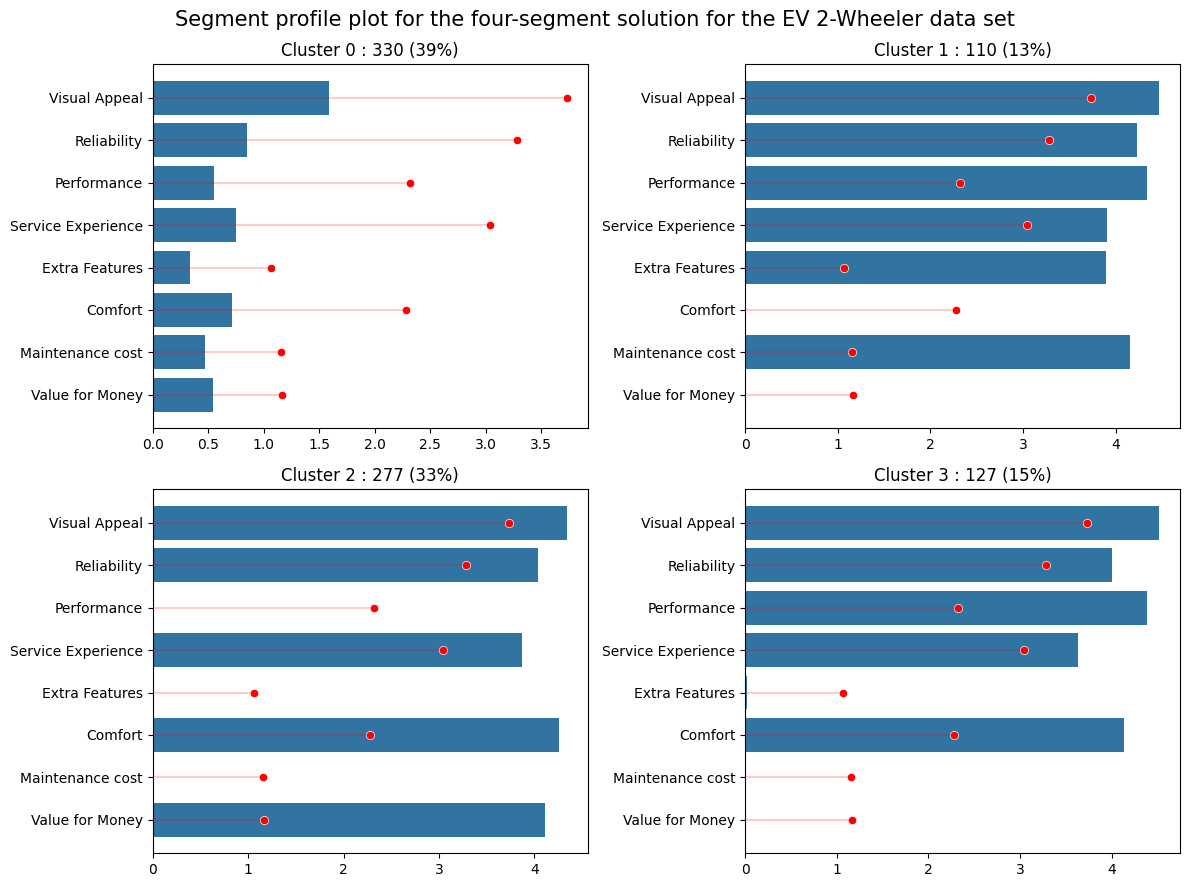

In [ ]:
pivot=df_p[df_cluster.columns].groupby("clusters").mean().T
pivot_mean=pivot.mean(axis=1).reset_index()
pivot_mean.columns=['Variable' , 'Value']

plt.figure(figsize=(12,9))
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(pivot,x=i,y=pivot.index)
  sns.scatterplot(pivot_mean,x='Value',y='Variable',color='red')
  for index,row in pivot_mean.iterrows():
    plt.hlines(y=row['Variable'],xmin=0,xmax=row['Value'],colors='red',alpha=0.2)
  plt.xlabel("")
  plt.ylabel("")
  plt.title(f"Cluster {i} : {df_p['clusters'].value_counts()[i]} ({df_p['clusters'].value_counts()[i]*100/len(df_p):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.show()

<ipython-input-36-44bbbe16b6b7>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
<ipython-input-36-44bbbe16b6b7>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')


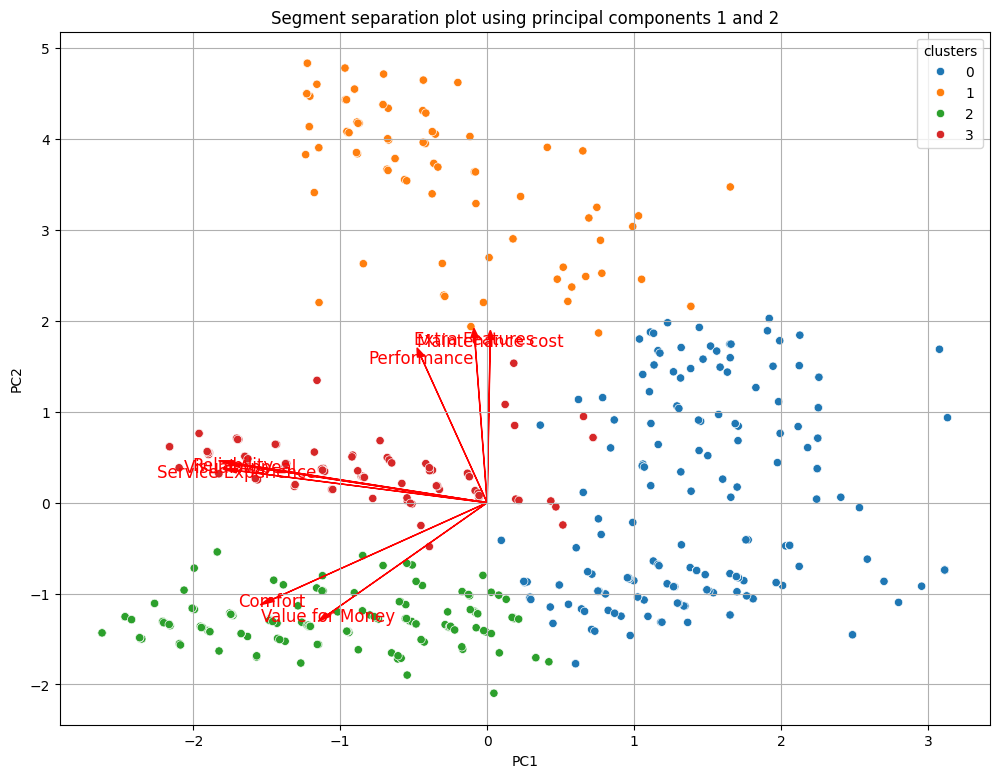

In [ ]:
index_names = factor_loadings.index
df_pca['clusters']=four_seg.labels_
plt.figure(figsize=(12,9))
sns.scatterplot(df_pca,x='PC1',y='PC2',hue='clusters',palette='tab10')
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.savefig("segment_separation.png")
plt.show()

Clearly we can segment 1 are satified consumers but lacks many opinion desipite being the largest. Segment 0 does not look satifised morever segment 2 are also likely to be happy but with lesser opinion , with this we can conclude that segment 0 people are satisfied with largest segment.

##Describing Segments

In [ ]:
df_in_segment=df.copy()
df_in_segment['cluster']=four_seg.labels_
df_in_segment.head()

review    Used it for  \
0  We all checked the bike's capacity to be 150 k...  Daily Commute   
1  Performance is very poor on this bike. The cha...     Everything   
2  I purchased this in April 2022 and the sales s...  Daily Commute   
3  If any issues come in scooty parts not availab...  Daily Commute   
4  Don't buy this vehicle unless you have a near ...  Daily Commute   

       Owned for      Ridden for  rating  Visual Appeal  Reliability  \
0    Never owned             NaN       1            3.0          4.0   
1         > 1 yr      < 5000 kms       1            3.0          1.0   
2     < 3 months      < 5000 kms       3            4.0          4.0   
3  6 months-1 yr  5000-10000 kms       1            1.0          1.0   
4  6 months-1 yr      < 5000 kms       1            3.0          4.0   

   Performance  Service Experience  Extra Features  ...  Value for Money  \
0          NaN                 NaN             NaN  ...              1.0   
1          NaN                 1.0             NaN  ...              3.0   
2          NaN                 2.0             NaN  ...              2.0   
3          NaN                 1.0             NaN  ...              1.0   
4          NaN                 1.0             NaN  ...              2.0   

   Model Name   Price Riding Range (km)  Top Speed (kmph)  Weight (kg)  \
0   TVS iQube  137890               100                78          117   
1   TVS iQube  137890               100                78          117   
2   TVS iQube  137890               100                78          117   
3   TVS iQube  137890               100                78          117   
4   TVS iQube  137890               100                78          117   

   Battery Charging Time (hrs)  Rated Power (W)  sentiments  cluster  
0                            5             3000    negative        0  
1                            5             3000    negative        0  
2                            5             3000    positive        2  
3                            5             3000    negative        0  
4                            5             3000    negative        2  

[5 rows x 22 columns]

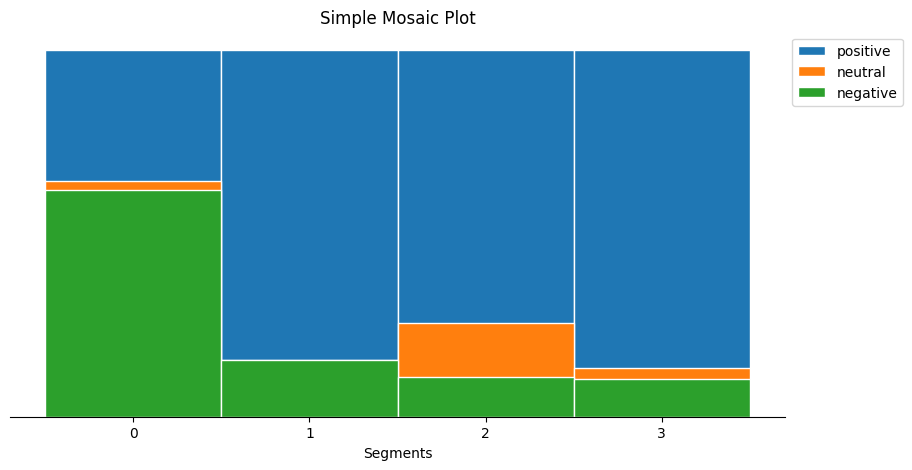

In [ ]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):

    fig,ax = plt.subplots(figsize =figsize)
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    col_order = ratio_cum_df.columns.tolist()
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']
segment_cluster = pd.crosstab(df_in_segment['cluster'],df_in_segment['sentiments'])
mosaicplot(segment_cluster,color_list,figsize=(10,5),barwidth=1)

**Clearly we can see that these people from segment 1 are satisfied on the other hand people from the segment 0 arent much satisfied though its 50% , so we can look into these segments by reading the reviews of these people we can rough idea of what nessescary thing can be done so that these people can change thier opinion**

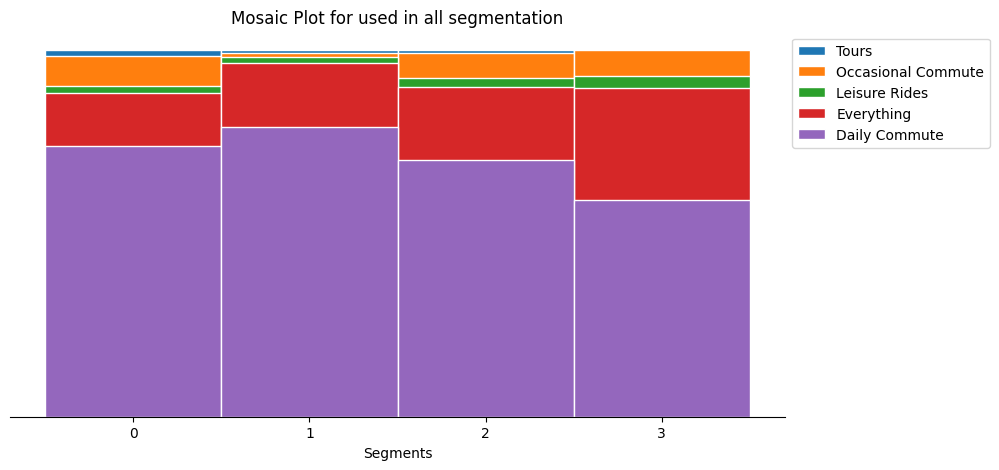

In [ ]:
segment_used=pd.crosstab(index=df_in_segment['cluster'],columns=df_in_segment['Used it for'])
mosaicplot(segment_used,color_list[:5],figsize=(10,5),barwidth=1,title="Mosaic Plot for used in all segmentation")

**Here most of the 2 wheeler bikes are being used for the daily communte, if we make a 2-wheeler for good perforance , milage also affodable for that people in the segments can change thier opinion.**

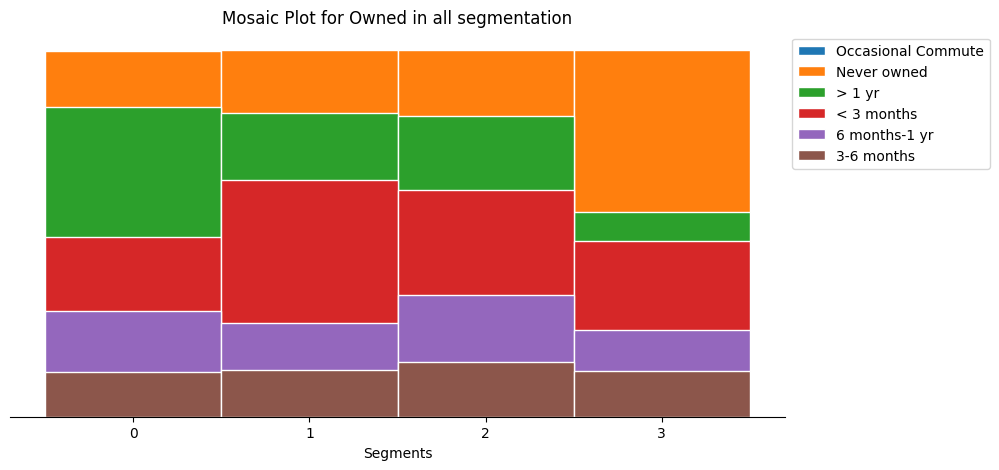

In [ ]:
owned_segment = pd.crosstab(index = df_in_segment['cluster'], columns = df_in_segment['Owned for'])
mosaicplot(owned_segment,color_list[:6],barwidth=1,figsize=(10,5),title="Mosaic Plot for Owned in all segmentation")

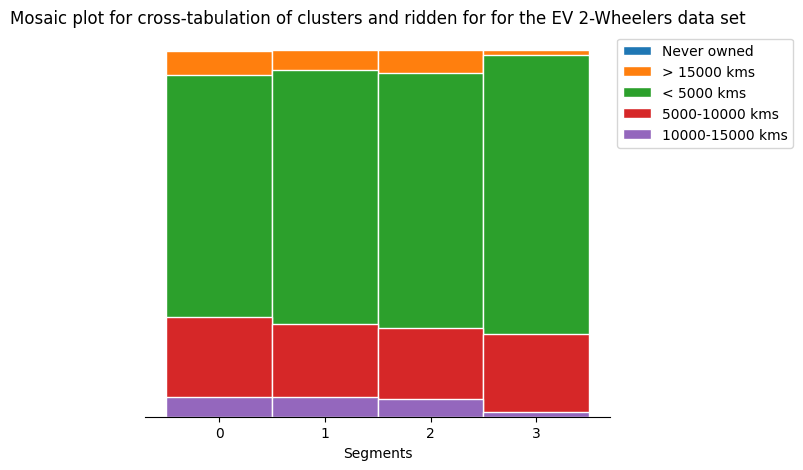

In [ ]:
mosaicplot(pd.crosstab(index=df_in_segment['cluster'],columns=df_in_segment['Ridden for']),
           color_list[:5],
           figsize=(6,5),
           barwidth = 1,
           title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )

**This is due to all people used 2 wheeler for commuting**

<ipython-input-54-73e6f9380bc9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster',y='rating',data=df_in_segment,palette='tab10')


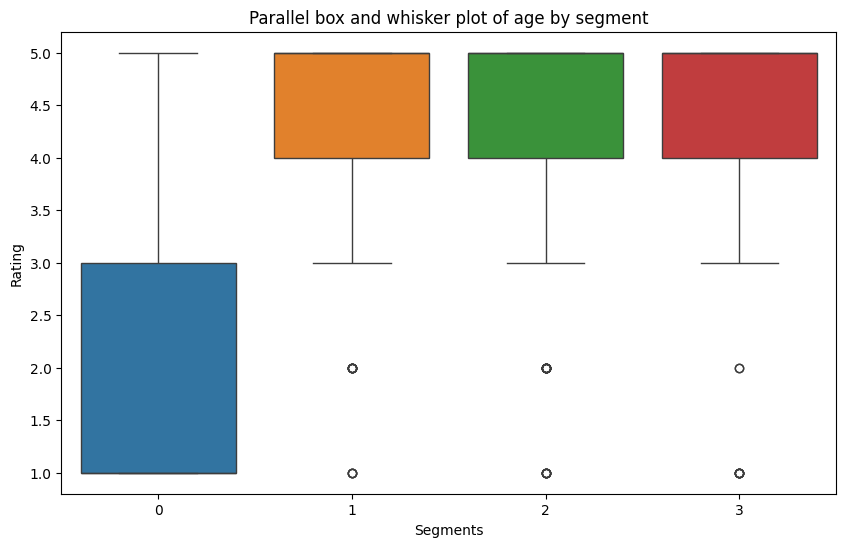

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster',y='rating',data=df_in_segment,palette='tab10')
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.show()

**Clearly people from segment 0 are dissatisfied**

<ipython-input-69-34b324b0a73b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster',y=col,data=df_in_segment,palette='tab10')
<ipython-input-69-34b324b0a73b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster',y=col,data=df_in_segment,palette='tab10')
<ipython-input-69-34b324b0a73b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster',y=col,data=df_in_segment,palette='tab10')
<ipython-input-69-34b324b0a73b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

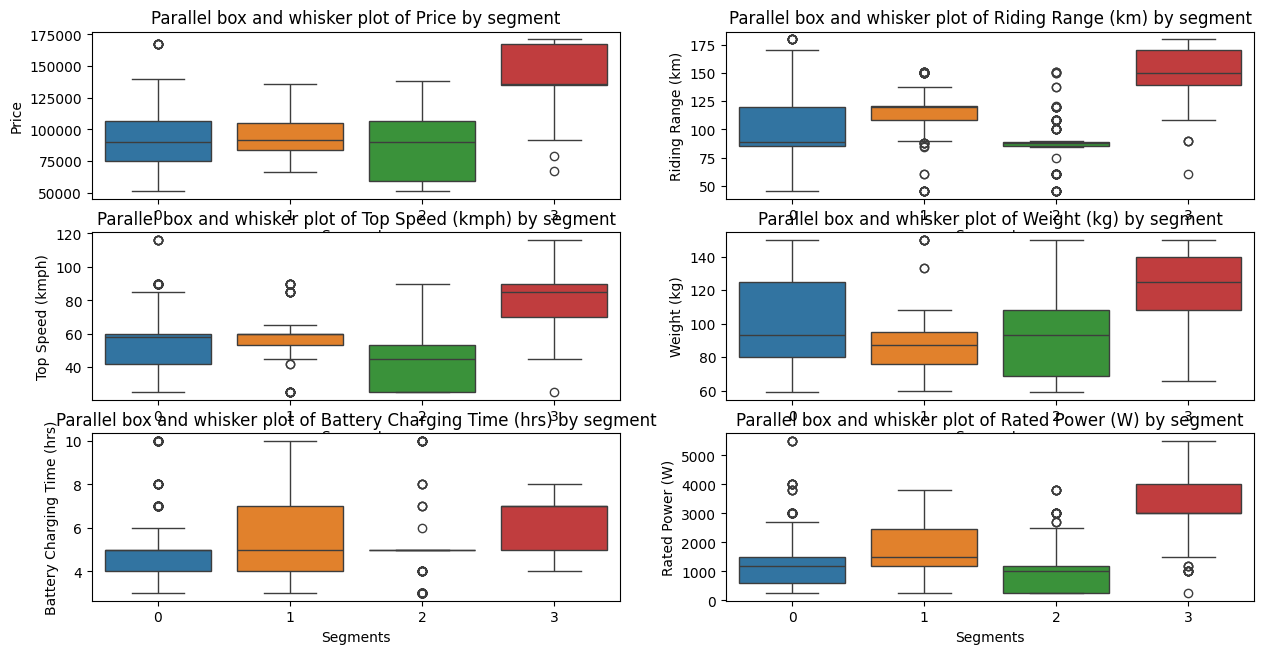

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_in_segment.columns[-8:-2]):
  plt.subplot(4,2,i+1)
  sns.boxplot(x='cluster',y=col,data=df_in_segment,palette='tab10')
  plt.xlabel("Segments")
  plt.ylabel(col)
  plt.title(f"Parallel box and whisker plot of {col} by segment")
plt.show()

**From above we see that people are segment 0 is unhappy as people are paying high price for a EV-2 wheeler, features that they are expecting arent up to the mark. Though charging time is less but speed,RP are also fairly low.**